In [1]:
import os
import json
from collections import Counter
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [7]:
DATA_DIR = 'dataset/training'
JSON_FILE = os.path.join(DATA_DIR, 'data.json')
INPUT_DIR = os.path.join(DATA_DIR, 'inputs')
OUTPUT_DIR = os.path.join(DATA_DIR, 'outputs')

In [10]:
# 1. Load metadata
with open(JSON_FILE, 'r') as f:
    data = json.load(f)

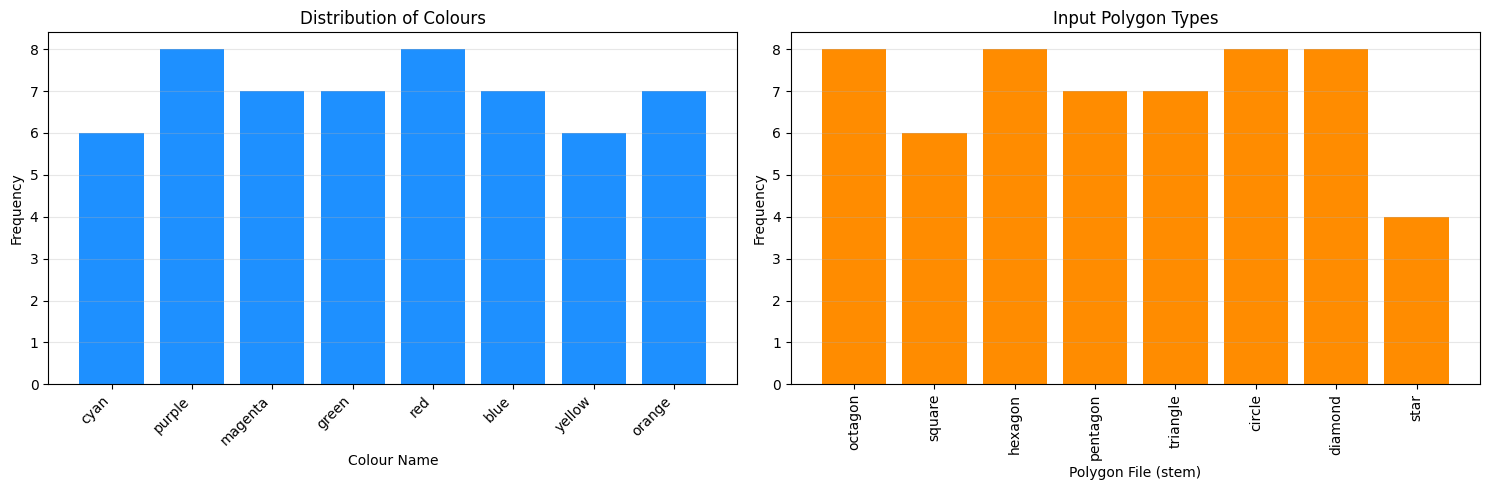

In [11]:
# 2. Summary and distribution of 'colour' and polygon types
colours = [sample.get('colour', 'Unknown') for sample in data]
input_files = [sample.get('input_polygon', 'Unknown') for sample in data]
output_files = [sample.get('output_image', 'Unknown') for sample in data]

colour_counts = Counter(colours)
polygon_counts = Counter([os.path.splitext(f)[0] for f in input_files])

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.bar(colour_counts.keys(), colour_counts.values(), color='dodgerblue')
plt.xticks(rotation=45, ha='right')
plt.title("Distribution of Colours")
plt.xlabel("Colour Name")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.3)

plt.subplot(1,2,2)
plt.bar(polygon_counts.keys(), polygon_counts.values(), color='darkorange')
plt.xticks(rotation=90)
plt.title("Input Polygon Types")
plt.xlabel("Polygon File (stem)")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Image shape stats (rows,cols,channels):
 - dim 0: min=128, max=128, mean=128.00
 - dim 1: min=128, max=128, mean=128.00
 - dim 2: min=3, max=3, mean=3.00

Input image mean intensity: mean=248.86, std=1.35
Output image mean intensity: mean=228.62, std=14.58

Unique color pixels per output: mean=2.0, std=0.0


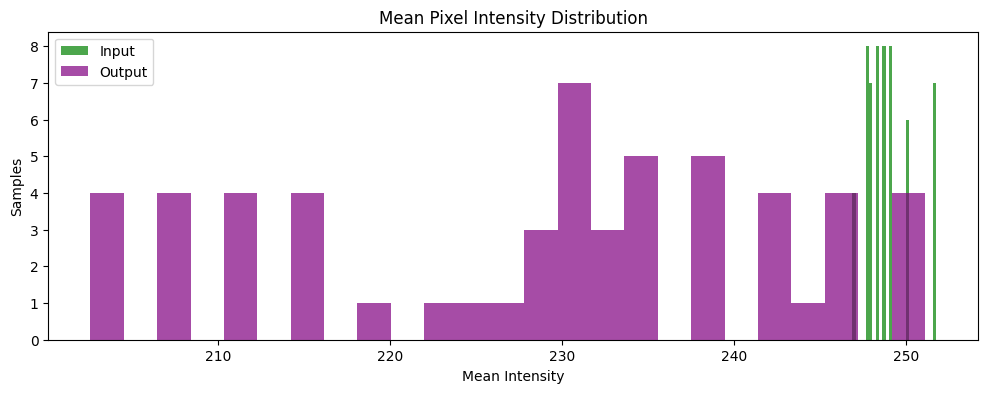

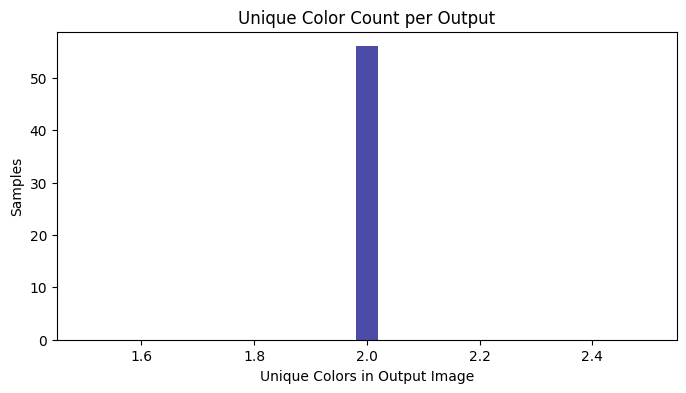

In [12]:
# 3. Pixel-level statistics, image sizes, color complexity
dims = []
input_means, output_means = [], []
unique_colors = []
for sample in data[:min(len(data), 500)]:  # analyze first 500 samples
    xi = Image.open(os.path.join(INPUT_DIR, sample["input_polygon"]))
    yi = Image.open(os.path.join(OUTPUT_DIR, sample["output_image"]))
    xi_arr = np.array(xi)
    yi_arr = np.array(yi)
    dims.append(xi_arr.shape)
    input_means.append(xi_arr.mean())
    output_means.append(yi_arr.mean())
    unique_colors.append(np.unique(yi_arr.reshape(-1, yi_arr.shape[-1]), axis=0).shape[0])

dims = np.array(dims)
print("Image shape stats (rows,cols,channels):")
for c in range(dims.shape[1]):
    print(f" - dim {c}: min={dims[:,c].min()}, max={dims[:,c].max()}, mean={dims[:,c].mean():.2f}")

print(f"\nInput image mean intensity: mean={np.mean(input_means):.2f}, std={np.std(input_means):.2f}")
print(f"Output image mean intensity: mean={np.mean(output_means):.2f}, std={np.std(output_means):.2f}")
print(f"\nUnique color pixels per output: mean={np.mean(unique_colors):.1f}, std={np.std(unique_colors):.1f}")

plt.figure(figsize=(12,4))
plt.hist(input_means, bins=25, alpha=0.7, label="Input", color='green')
plt.hist(output_means, bins=25, alpha=0.7, label="Output", color='purple')
plt.title("Mean Pixel Intensity Distribution")
plt.xlabel("Mean Intensity")
plt.ylabel("Samples")
plt.legend()
plt.show()

plt.figure(figsize=(8,4))
plt.hist(unique_colors, bins=25, color='navy', alpha=0.7)
plt.title("Unique Color Count per Output")
plt.xlabel("Unique Colors in Output Image")
plt.ylabel("Samples")
plt.show()

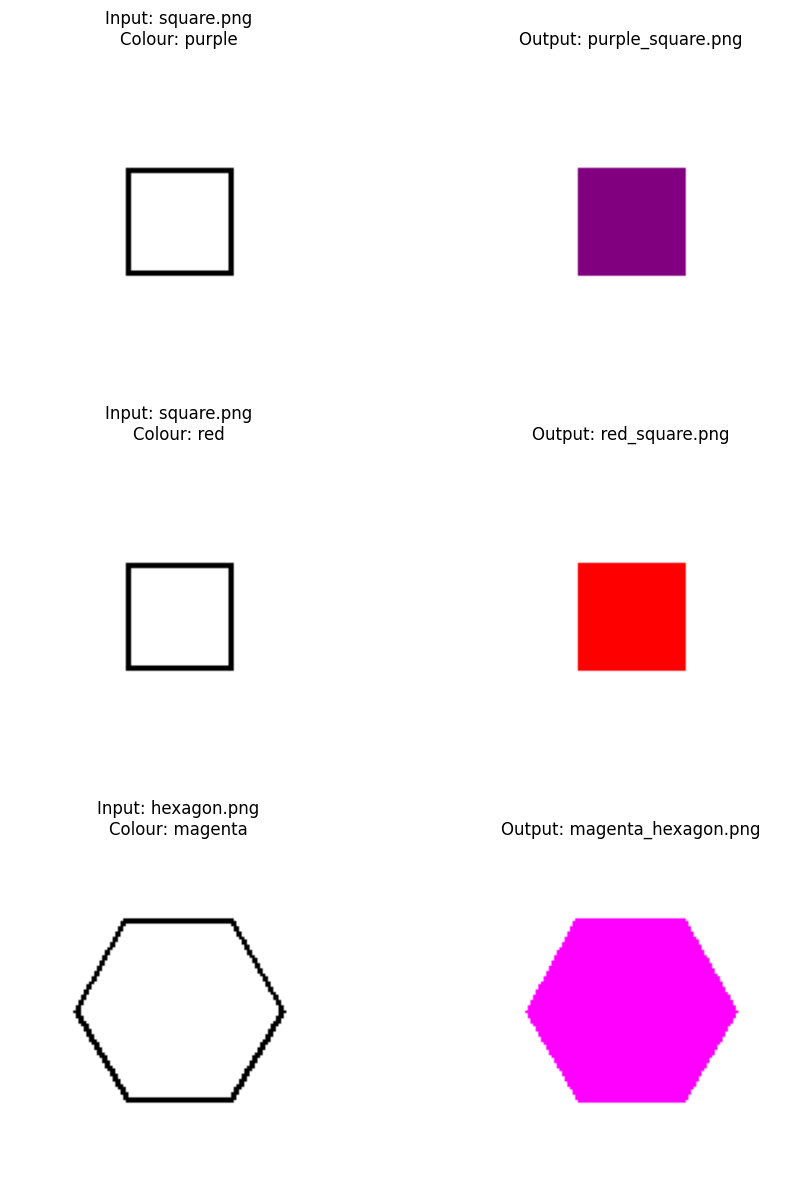

In [13]:
# 4. Visual sample exploration by most common colours
import random
N = 3
most_common_colours = [c for c, _ in colour_counts.most_common(N)]
plt.figure(figsize=(10, 4*N))
for i, colour in enumerate(most_common_colours):
    idx = next(j for j,s in enumerate(data) if s['colour'] == colour)
    xi = np.array(Image.open(os.path.join(INPUT_DIR, data[idx]["input_polygon"])))
    yi = np.array(Image.open(os.path.join(OUTPUT_DIR, data[idx]["output_image"])))
    plt.subplot(N,2,2*i+1)
    plt.imshow(xi)
    plt.title(f"Input: {data[idx]['input_polygon']}\nColour: {colour}")
    plt.axis('off')
    plt.subplot(N,2,2*i+2)
    plt.imshow(yi)
    plt.title(f"Output: {data[idx]['output_image']}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [19]:
# This goes at the end of your notebook, after you've generated:
# - image_sizes (np.array)
# - pixel_means_input, pixel_means_output (lists)
# - unique_colors (list)
# - data (list of dicts)
# - colour_counts, polygon_counts (Counter objects)

widths, heights = image_sizes[:,1], image_sizes[:,0]  # [width, height, ...] layout in np.array

print(f"Total samples: {len(data)}")
print(f"Number of unique colours: {len(colour_counts)}")
print(f"Top 5 most common colours: {colour_counts.most_common(5)}")
print(f"Number of unique polygon types: {len(polygon_counts)}")
print(f"Sample polygon types: {list(polygon_counts.keys())[:5]}")

print("\nImage sizes (WxH):")
print(f" - Min size: {widths.min()}x{heights.min()}")
print(f" - Max size: {widths.max()}x{heights.max()}")
print(f" - Mean size: {widths.mean():.1f}x{heights.mean():.1f}")

print(f"\nMean pixel intensity (inputs): mean={np.mean(pixel_means_input):.2f}, std={np.std(pixel_means_input):.2f}")
print(f"Mean pixel intensity (outputs): mean={np.mean(pixel_means_output):.2f}, std={np.std(pixel_means_output):.2f}")

print(f"\nUnique colors per output image: mean={np.mean(unique_colors):.1f}, std={np.std(unique_colors):.1f}")

print("\nEDA Summary complete.")


NameError: name 'image_sizes' is not defined

Image shape stats (rows,cols,channels):
 - dim 0: min=128, max=128, mean=128.00
 - dim 1: min=128, max=128, mean=128.00
 - dim 2: min=3, max=3, mean=3.00

Input image mean intensity: mean=248.86, std=1.35
Output image mean intensity: mean=228.62, std=14.58

Unique color pixels per output: mean=2.0, std=0.0


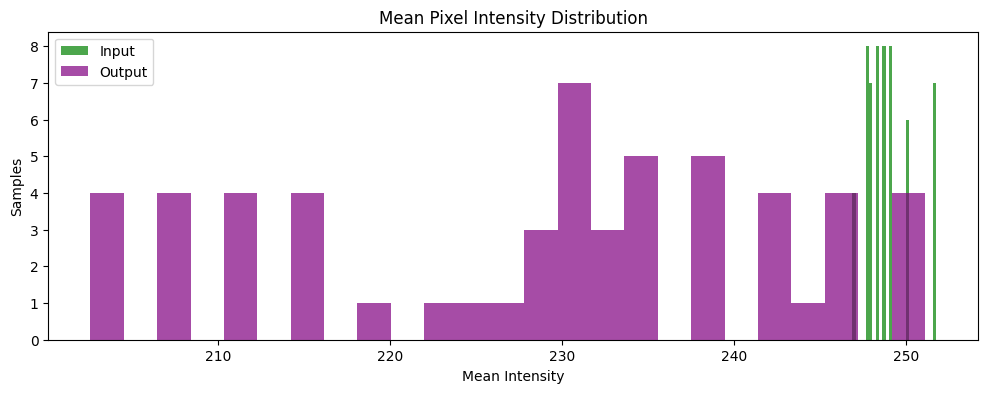

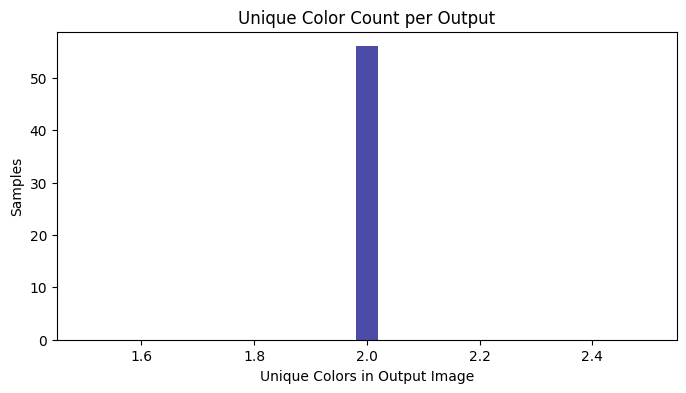

In [20]:
# import os
# import numpy as np
# import matplotlib.pyplot as plt
# from PIL import Image

# # Ensure these are defined earlier in your notebook
# # INPUT_DIR = "path_to_input_images"
# # OUTPUT_DIR = "path_to_output_images"
# # data = [{'input_polygon': 'img1.png', 'output_image': 'img1_out.png'}, ...]

dims = []
input_means, output_means = [], []
unique_colors = []

for sample in data[:min(len(data), 500)]:
    xi_path = os.path.join(INPUT_DIR, sample["input_polygon"])
    yi_path = os.path.join(OUTPUT_DIR, sample["output_image"])

    if not os.path.exists(xi_path) or not os.path.exists(yi_path):
        continue  # Skip missing files

    xi = Image.open(xi_path).convert("RGB")
    yi = Image.open(yi_path).convert("RGB")

    xi_arr = np.array(xi)
    yi_arr = np.array(yi)

    dims.append(xi_arr.shape)
    input_means.append(xi_arr.mean())
    output_means.append(yi_arr.mean())

    reshaped = yi_arr.reshape(-1, yi_arr.shape[-1])
    unique_colors.append(np.unique(reshaped, axis=0).shape[0])

dims = np.array(dims)

print("Image shape stats (rows,cols,channels):")
for c in range(dims.shape[1]):
    print(f" - dim {c}: min={dims[:,c].min()}, max={dims[:,c].max()}, mean={dims[:,c].mean():.2f}")

print(f"\nInput image mean intensity: mean={np.mean(input_means):.2f}, std={np.std(input_means):.2f}")
print(f"Output image mean intensity: mean={np.mean(output_means):.2f}, std={np.std(output_means):.2f}")
print(f"\nUnique color pixels per output: mean={np.mean(unique_colors):.1f}, std={np.std(unique_colors):.1f}")

# Plotting
plt.figure(figsize=(12, 4))
plt.hist(input_means, bins=25, alpha=0.7, label="Input", color='green')
plt.hist(output_means, bins=25, alpha=0.7, label="Output", color='purple')
plt.title("Mean Pixel Intensity Distribution")
plt.xlabel("Mean Intensity")
plt.ylabel("Samples")
plt.legend()
plt.show()

plt.figure(figsize=(8, 4))
plt.hist(unique_colors, bins=25, color='navy', alpha=0.7)
plt.title("Unique Color Count per Output")
plt.xlabel("Unique Colors in Output Image")
plt.ylabel("Samples")
plt.show()


In [22]:
# Show a few actual grayscale values from outputs
for i, sample in enumerate(data[:5]):
    yi_path = os.path.join(OUTPUT_DIR, sample["output_image"])
    yi = Image.open(yi_path).convert("L")
    yi_arr = np.array(yi)
    print(f"Sample {i+1} unique grayscale values:", np.unique(yi_arr))


Sample 1 unique grayscale values: [179 255]
Sample 2 unique grayscale values: [ 53 255]
Sample 3 unique grayscale values: [105 255]
Sample 4 unique grayscale values: [105 255]
Sample 5 unique grayscale values: [ 53 255]
